# Week 6 Weekly Activity

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [1]:
import sys
assert sys.version_info >=(3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [3]:
img = cv.imread('images/boat.jpg')
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
img_copy = img.copy()

# Otsu threshold
ret, thresholded  = cv.threshold(grey, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
thresholded = cv.bitwise_not(thresholded)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image
img_copy = img.copy()

# Draw bounding boxes around boat and people regions
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w > 50 and h > 50:  # Filter out small noise
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img('Boat and People Segmentation', img_copy)

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [2]:
# Read and preprocess the image
img = cv.imread('images/leaf.jfif', cv.IMREAD_GRAYSCALE)
_, img_binary = cv.threshold(img, 0, 255, cv.THRESH_OTSU)

# Initialize variables for storing intermediate results
erosion, dilation, opening, closing = None, None, None, None

# Function to update the displayed image based on the trackbar value
def update_image(x):
    global erosion, dilation, opening, closing
    kernel_size = x
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply morphological transformations
    erosion = cv.erode(img_binary, kernel, iterations=1)
    dilation = cv.dilate(img_binary, kernel, iterations=1)
    opening = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel)

    # Combine the images for display
    img_result = np.hstack((img_binary, erosion, dilation, opening, closing))
    cv.imshow('Window', img_result)

# Create a GUI window and trackbars
cv.namedWindow('Window')
cv.createTrackbar('Kernel Size', 'Window', 1, 20, update_image)

# Initial call to update the displayed image
update_image(1)

cv.waitKey(0)
cv.destroyAllWindows()


3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

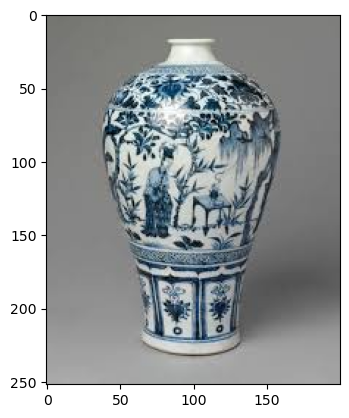

In [22]:
img = cv.imread('images/color_space/porcelain5.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

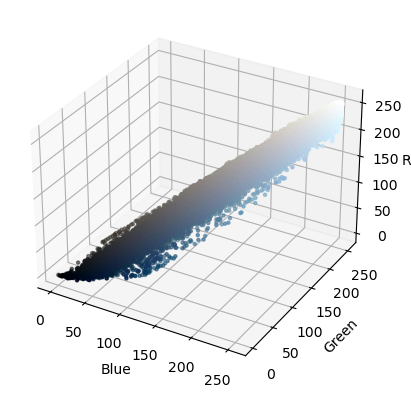

In [23]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

In [24]:
min(pixel_colors)

[0.0, 0.003921568859368563, 0.007843137718737125]

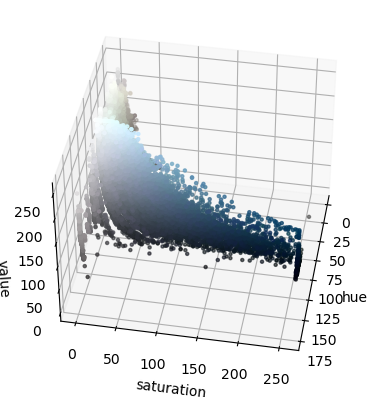

In [25]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")


axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")

axis.view_init(40, 10)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

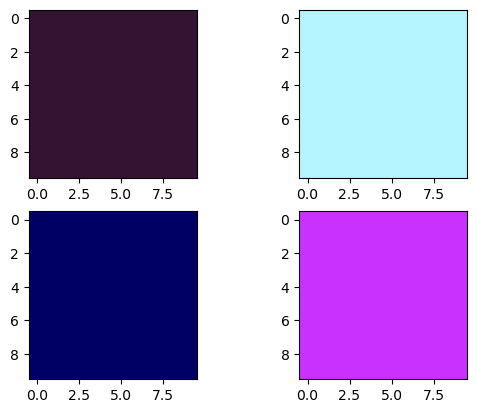

In [30]:
light_blue_value = (50, 20, 50)
dark_blue_value = (180, 245, 255)
light_white_value = (0, 0, 100)
dark_white_value = (200, 50, 255)

lo_square_blue = np.full((10, 10, 3), light_blue_value, dtype = np.uint8)/255.0
do_square_blue = np.full((10, 10, 3), dark_blue_value, dtype = np.uint8)/255.0
lo_square_white = np.full((10, 10, 3), light_white_value, dtype = np.uint8)/255.0
do_square_white = np.full((10, 10, 3), dark_white_value, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(lo_square_blue)
plt.subplot(2, 2, 2)
plt.imshow(do_square_blue)
plt.subplot(2, 2, 3)
plt.imshow(lo_square_white)
plt.subplot(2, 2, 4)
plt.imshow(do_square_white)
plt.show()

In [ ]:
mask1 = cv.inRange(img_hsv, light_blue_value, dark_blue_value)
mask2 = cv.inRange(img_hsv, light_white_value, dark_white_value)


combine_mask = cv.bitwise_or(mask1, mask2)

res = cv.bitwise_and(img, img, mask = combine_mask)

plt.subplot(1, 2, 1)
plt.imshow(combine_mask, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [28]:
def color_seg(img, color1_low, color1_high, color2_low, color2_high, smooth=True):
    """Args:
    img: source img
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    #HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #inrange
    mask1 = cv.inRange(img_hsv, color1_low, color1_high)
    mask2 = cv.inRange(img_hsv, color2_low, color2_high)
    
    # Combine the masks
    mask = cv.bitwise_or(mask1, mask2)
    
    #morphological operations
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations = 2)
    
    return cv.bitwise_and(img_ori, img_ori, mask=mask)

imgs = []

for i in range(1,6):
    img = cv.imread('images\color_space\porcelain'+str(i)+'.jfif')
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, light_blue_value, dark_blue_value, light_white_value, dark_white_value) for img in imgs]

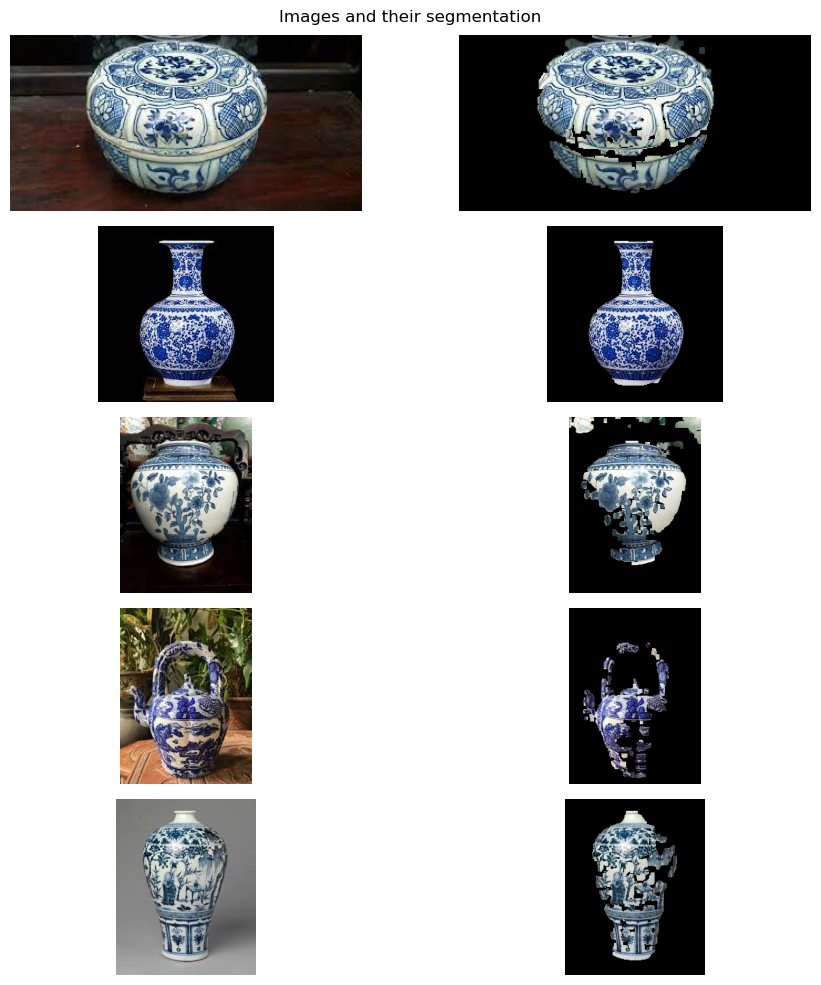

In [29]:
fig,ax = plt.subplots(5,2,figsize=(10,10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Images and their segmentation")
plt.tight_layout()
plt.show()